In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import datetime
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### Loading and understanding the dataset:

In [2]:
data = pd.read_csv('C:/Users/Dell/Downloads/New York State Hospital Inpatient Discharge.csv')

In [3]:
data.head(5)

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2622133 entries, 0 to 2622132
Data columns (total 38 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   index                                int64  
 1   Health Service Area                  object 
 2   Hospital County                      object 
 3   Operating Certificate Number         float64
 4   Facility ID                          float64
 5   Facility Name                        object 
 6   Age Group                            object 
 7   Zip Code - 3 digits                  object 
 8   Gender                               object 
 9   Race                                 object 
 10  Ethnicity                            object 
 11  Length of Stay                       object 
 12  Type of Admission                    object 
 13  Patient Disposition                  object 
 14  Discharge Year                       int64  
 15  CCS Diagnosis Code              

In [5]:
data.shape 

(2622133, 38)

### Duplicates:


In [6]:
data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2622128    False
2622129    False
2622130    False
2622131    False
2622132    False
Length: 2622133, dtype: bool

In [7]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates()

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,NaN,F,White,...,Self-Pay,NaN,3623.0,NaN,NaN,0,N,Y,4476.23,1672.65
1,1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,NaN,M,White,...,Medicare,Blue Cross,216951.0,216951.0,NaN,0,N,Y,148612.34,51414.70
2,2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,M,White,...,Blue Cross,Self-Pay,3076.0,NaN,NaN,0,N,N,16561.99,4032.49
3,3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,140796.0,140796.0,170254.0,0,N,N,13593.51,4947.81
4,4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,NaN,F,White,...,Insurance Company,Self-Pay,170254.0,170254.0,170254.0,0,N,N,31962.58,16988.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622128,2622128,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,230373.65,83223.46
2622129,2622129,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,N,20335.27,7677.97
2622130,2622130,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,Self-Pay,NaN,NaN,NaN,NaN,0,Y,Y,27775.54,9819.99
2622131,2622131,NaN,NaN,NaN,NaN,Abortion Record - Facility Name Redacted,30 to 49,OOS,F,Other Race,...,NaN,NaN,NaN,NaN,NaN,0,Y,Y,11738.58,3295.21


### Checking for null values:

using different methods:

In [9]:
data.isnull().sum()

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3201
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [10]:
data.isna().any()

index                                  False
Health Service Area                     True
Hospital County                         True
Operating Certificate Number            True
Facility ID                             True
Facility Name                          False
Age Group                              False
Zip Code - 3 digits                     True
Gender                                 False
Race                                   False
Ethnicity                              False
Length of Stay                         False
Type of Admission                      False
Patient Disposition                     True
Discharge Year                         False
CCS Diagnosis Code                      True
CCS Diagnosis Description               True
CCS Procedure Code                      True
CCS Procedure Description               True
APR DRG Code                           False
APR DRG Description                    False
APR MDC Code                           False
APR MDC De

In [11]:
data.notnull().sum()

index                                  2622133
Health Service Area                    2617246
Hospital County                        2617246
Operating Certificate Number           2617246
Facility ID                            2617246
Facility Name                          2622133
Age Group                              2622133
Zip Code - 3 digits                    2618932
Gender                                 2622133
Race                                   2622133
Ethnicity                              2622133
Length of Stay                         2622133
Type of Admission                      2622133
Patient Disposition                    2622030
Discharge Year                         2622133
CCS Diagnosis Code                     2619860
CCS Diagnosis Description              2619860
CCS Procedure Code                     2619860
CCS Procedure Description              2619860
APR DRG Code                           2622133
APR DRG Description                    2622133
APR MDC Code 

In [12]:
data.notna().all()

index                                   True
Health Service Area                    False
Hospital County                        False
Operating Certificate Number           False
Facility ID                            False
Facility Name                           True
Age Group                               True
Zip Code - 3 digits                    False
Gender                                  True
Race                                    True
Ethnicity                               True
Length of Stay                          True
Type of Admission                       True
Patient Disposition                    False
Discharge Year                          True
CCS Diagnosis Code                     False
CCS Diagnosis Description              False
CCS Procedure Code                     False
CCS Procedure Description              False
APR DRG Code                            True
APR DRG Description                     True
APR MDC Code                            True
APR MDC De

### Finding the continous and catergoical columns using nunique()

In [13]:
data.nunique()

index                                  2622133
Health Service Area                          8
Hospital County                             57
Operating Certificate Number               189
Facility ID                                225
Facility Name                              225
Age Group                                    5
Zip Code - 3 digits                         78
Gender                                       3
Race                                         4
Ethnicity                                    3
Length of Stay                             222
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         262
CCS Diagnosis Description                  262
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code 

### Categorical columns:

- Health Service Area
- Hospital County            
- Age Group                                   
- Zip Code - 3 digits                        
- Gender                                       
- Race 
- Ethnicity 
- Type of Admission 
- Patient Disposition   
- CCS Diagnosis Code 
- CCS Diagnosis Description
- CCS Procedure Code  
- CCS Procedure Description 
- APR DRG Code   
- APR DRG Description 
- APR MDC Code   
- APR MDC Description 
- APR Severity of Illness Code
- APR Medical Surgical Description
- Source of Payment 1 
- Source of Payment 2 
- Source of Payment 3  
- Abortion Edit Indicator 
- Emergency Department Indicator  



### Continuous columns:

- index
- Operating Certificate Number
- Facility ID 
- Length of Stay
- Discharge Year
- APR Severity of Illness Description
- APR Risk of Mortality 
- Attending Provider License Number 
- Operating Provider License Number 
- Other Provider License Number 
- Birth Weight
- Total Charges
- Total Costs 

In [14]:
#5-point summary

data.describe().T

,count,mean,std,min,25%,50%,75%,max
index,2622133.0,1.311066e+06,7.569447e+05,0.00,655533.00,1311066.00,1966599.00,2622132.00
Operating Certificate Number,2617246.0,5.019051e+06,2.249577e+06,101000.00,2951001.00,5907002.00,7002002.00,7004010.00
Facility ID,2617246.0,1.036953e+03,6.448892e+02,1.00,541.00,1117.00,1450.00,9059.00
Discharge Year,2622133.0,2.010000e+03,0.000000e+00,2010.00,2010.00,2010.00,2010.00,2010.00
CCS Diagnosis Code,2619860.0,1.919431e+02,1.565932e+02,1.00,106.00,157.00,218.00,670.00
CCS Procedure Code,2619860.0,1.121324e+02,8.761224e+01,0.00,0.00,124.00,211.00,231.00
APR DRG Code,2622133.0,4.069629e+02,2.404910e+02,1.00,198.00,361.00,640.00,956.00
APR MDC Code,2622133.0,1.016206e+01,5.923678e+00,0.00,5.00,8.00,15.00,25.00
APR Severity of Illness Code,2622133.0,1.948373e+00,8.986120e-01,0.00,1.00,2.00,3.00,4.00
Attending Provider License Number,2617246.0,1.266323e+06,8.226220e+06,1.00,166659.00,205362.00,233561.00,90999999.00


### Missing values:

In [15]:
#Handling the missing values:

print(data['Health Service Area'].value_counts(dropna=False))

New York City     1233121
Long Island        385262
Hudson Valley      273037
Western NY         185080
Capital/Adiron     179929
Central NY         170912
Finger Lakes       158605
Southern Tier       31300
NaN                  4887
Name: Health Service Area, dtype: int64


In [16]:
#treating the missing values:
#health service area is very important for analysis hence the using .fillna(), filled the nan values.

data.dropna(subset=['Health Service Area'], inplace=True)

In [17]:
print(data['Health Service Area'].value_counts(dropna=False))

New York City     1233121
Long Island        385262
Hudson Valley      273037
Western NY         185080
Capital/Adiron     179929
Central NY         170912
Finger Lakes       158605
Southern Tier       31300
Name: Health Service Area, dtype: int64


In [18]:
#treating the missing values:
#Hospital County is very important for analysis hence the using .fillna(), filled the nan values.

data.dropna(subset=['Hospital County'], inplace=True)

In [19]:
print(data['Hospital County'].value_counts(dropna=False))

Manhattan      445288
Kings          298247
Queens         221325
Nassau         215831
Bronx          204328
Suffolk        169431
Westchester    131946
Erie           129617
Monroe         109402
Onondaga        76289
Richmond        63933
Albany          62192
Orange          42955
Oneida          36454
Dutchess        35424
Rockland        34898
Broome          29078
Schenectady     22989
Niagara         21450
Chemung         17366
Warren          17134
Rensselaer      15636
Otsego          14305
Ulster          13933
St Lawrence     13601
Chautauqua      13463
Ontario         13057
Jefferson       12111
Clinton         11589
Saratoga         9931
Steuben          9678
Putnam           8093
Cattaraugus      7686
Montgomery       6995
Oswego           6759
Tompkins         6686
Franklin         6460
Columbia         5991
Sullivan         5788
Cayuga           5605
Madison          5578
Genesee          5235
Cortland         4826
Wayne            4232
Fulton           4112
Wyoming   

In [20]:
#Operating Certificate Number

#Operating Certificate Number is very important for analysis hence the using .fillna(), filled the nan values.

data.dropna(subset=['Operating Certificate Number'], inplace=True)

In [21]:
print(data['Operating Certificate Number'].value_counts(dropna=False))

7002054.0    116612
7000006.0     90538
7002024.0     69310
1401014.0     63970
2951001.0     58673
              ...  
5263700.0       108
226700.0         48
5526700.0        34
7002031.0        22
2701006.0         4
Name: Operating Certificate Number, Length: 189, dtype: int64


In [22]:
#Facility ID

data.dropna(subset=['Facility ID'], inplace=True)

In [23]:
print(data['Facility ID'].value_counts(dropna=False))

1456.0    58696
541.0     54232
1464.0    51024
1458.0    46720
1169.0    45213
          ...  
37.0         48
2.0          37
1002.0       34
1465.0       22
414.0         4
Name: Facility ID, Length: 225, dtype: int64


In [24]:
#Zip Code - 3 digits


data.dropna(subset=['Zip Code - 3 digits'], inplace=True)


In [25]:
print(data['Zip Code - 3 digits'].value_counts(dropna=False))

112      235587
117      174115
104      138345
100      135623
112.0    127703
          ...  
122.0      1881
108.0      1016
116.0       759
106.0       581
118.0        36
Name: Zip Code - 3 digits, Length: 78, dtype: int64


In [26]:
#Patient Disposition

print(data['Patient Disposition'].value_counts(dropna=False))

Home or Self Care                        1779214
Home w/ Home Health Services              321519
Skilled Nursing Home                      245789
Left Against Medical Advice                56837
Expired                                    56042
Short-term Hospital                        47160
Inpatient Rehabilitation Facility          44449
Psychiatric Hospital or Unit of Hosp       15308
Hospice - Medical Facility                  8632
Another Type Not Listed                     8533
Hospice - Home                              8526
Facility w/ Custodial/Supportive Care       7273
Cancer Center or Children's Hospital        5032
Medicare Cert Long Term Care Hospital       3474
Court/Law Enforcement                       3316
Hosp Basd Medicare Approved Swing Bed       2037
Federal Health Care Facility                 716
NaN                                          102
Medicaid Cert Nursing Facility                46
Critical Access Hospital                      41
Name: Patient Dispos

In [27]:
#Patient Disposition

mode = data['Patient Disposition'].mode()[0]
data['Patient Disposition'].fillna(mode, inplace=True)

In [28]:
print(data['Patient Disposition'].value_counts(dropna=False))

Home or Self Care                        1779316
Home w/ Home Health Services              321519
Skilled Nursing Home                      245789
Left Against Medical Advice                56837
Expired                                    56042
Short-term Hospital                        47160
Inpatient Rehabilitation Facility          44449
Psychiatric Hospital or Unit of Hosp       15308
Hospice - Medical Facility                  8632
Another Type Not Listed                     8533
Hospice - Home                              8526
Facility w/ Custodial/Supportive Care       7273
Cancer Center or Children's Hospital        5032
Medicare Cert Long Term Care Hospital       3474
Court/Law Enforcement                       3316
Hosp Basd Medicare Approved Swing Bed       2037
Federal Health Care Facility                 716
Medicaid Cert Nursing Facility                46
Critical Access Hospital                      41
Name: Patient Disposition, dtype: int64


In [29]:
#CCS Diagnosis Code

mode = data['CCS Diagnosis Code'].mode()[0]
data['CCS Diagnosis Code'].fillna(mode, inplace=True)

In [30]:
print(data['CCS Diagnosis Code'].value_counts(dropna=False))

218.0    243029
657.0     63036
108.0     62105
2.0       60913
102.0     60001
          ...  
53.0         42
86.0         42
223.0        31
206.0        21
174.0        13
Name: CCS Diagnosis Code, Length: 260, dtype: int64


In [31]:
#CCS Diagnosis Description

mode = data['CCS Diagnosis Description'].mode()[0]
data['CCS Diagnosis Description'].fillna(mode, inplace=True)

In [32]:
print(data['CCS Diagnosis Description'].value_counts(dropna=False))

LIVEBORN              243029
MOOD DISORDERS         63036
CHF                    62105
SEPTICEMIA             60913
CHEST PAIN             60001
                       ...  
HYPERLIPIDEMIA            42
CATARACT                  42
BIRTH TRAUMA              31
OSTEOPOROSIS              21
FEMALE INFERTILITY        13
Name: CCS Diagnosis Description, Length: 260, dtype: int64


In [33]:
#CCS Procedure Code

mode = data['CCS Procedure Code'].mode()[0]
data['CCS Procedure Code'].fillna(mode, inplace=True)

In [34]:
print(data['CCS Diagnosis Code'].value_counts(dropna=False))

218.0    243029
657.0     63036
108.0     62105
2.0       60913
102.0     60001
          ...  
53.0         42
86.0         42
223.0        31
206.0        21
174.0        13
Name: CCS Diagnosis Code, Length: 260, dtype: int64


In [35]:
#CCS Procedure Description

mode = data['CCS Procedure Description'].mode()[0]
data['CCS Procedure Description'].fillna(mode, inplace=True)

In [36]:
print(data['CCS Diagnosis Code'].value_counts(dropna=False))

218.0    243029
657.0     63036
108.0     62105
2.0       60913
102.0     60001
          ...  
53.0         42
86.0         42
223.0        31
206.0        21
174.0        13
Name: CCS Diagnosis Code, Length: 260, dtype: int64


In [37]:
#APR Severity of Illness Description

mode = data['APR Severity of Illness Description'].mode()[0]
data['APR Severity of Illness Description'].fillna(mode, inplace=True)

In [38]:
print(data['APR Severity of Illness Description'].value_counts(dropna=False))

Minor       970787
Moderate    959850
Major       528950
Extreme     154459
Name: APR Severity of Illness Description, dtype: int64


In [39]:
#APR Risk of Mortality

mode = data['APR Risk of Mortality'].mode()[0]
data['APR Risk of Mortality'].fillna(mode, inplace=True)

In [40]:
print(data['APR Risk of Mortality'].value_counts(dropna=False))

Minor       1638292
Moderate     553438
Major        300187
Extreme      122129
Name: APR Risk of Mortality, dtype: int64


In [41]:
#Source of Payment 2 

mode = data['Source of Payment 2'].mode()[0]
data['Source of Payment 2'].fillna(mode, inplace=True)

In [42]:
print(data['Source of Payment 2'].value_counts(dropna=False))

Medicaid                     1385914
Self-Pay                      484605
Medicare                      326128
Insurance Company             239030
Blue Cross                    167566
CHAMPUS                         5695
Other Federal Program           3614
Other Non-Federal Program        845
Workers Compensation             352
Unknown                          297
Name: Source of Payment 2, dtype: int64


In [43]:
#Source of Payment 3

mode = data['Source of Payment 3'].mode()[0]
data['Source of Payment 3'].fillna(mode, inplace=True)

In [44]:
print(data['Source of Payment 3'].value_counts(dropna=False))

Self-Pay                     2439271
Medicaid                      100072
Insurance Company              29313
Medicare                       23901
Blue Cross                     19148
CHAMPUS                         1474
Other Federal Program            463
Unknown                          192
Other Non-Federal Program        148
Workers Compensation              64
Name: Source of Payment 3, dtype: int64


In [45]:
#Operating Provider License Number

mode = data['Operating Provider License Number'].mode()[0]
data['Operating Provider License Number'].fillna(mode, inplace=True)

In [46]:
print(data['Operating Provider License Number'].value_counts(dropna=False))

195267.0      669281
135851.0        3628
175020.0        3096
149709.0        2791
153130.0        2504
               ...  
20003402.0         1
217375.0           1
86244.0            1
185247.0           1
7926.0             1
Name: Operating Provider License Number, Length: 36236, dtype: int64


In [47]:
#Other Provider License Number

mode = data['Other Provider License Number'].mode()[0]
data['Other Provider License Number'].fillna(mode, inplace=True)

In [48]:
print(data['Other Provider License Number'].value_counts(dropna=False))

166545.0      2128789
246844.0         2354
185949.0         1711
223441.0         1610
233575.0         1302
               ...   
1987.0              1
17168.0             1
174350.0            1
90003603.0          1
131122.0            1
Name: Other Provider License Number, Length: 12648, dtype: int64


In [49]:
data.isna().sum()

#hence all missing values has been treated.

index                                  0
Health Service Area                    0
Hospital County                        0
Operating Certificate Number           0
Facility ID                            0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of 

### Detecting the outliers using diffrent method:

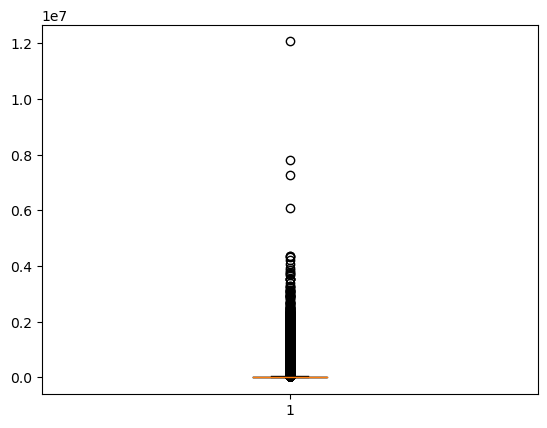

In [50]:
#using visulaization method:

plt.boxplot(data['Total Charges'])

plt.show()

In [51]:
#Length of Stay
#changing the data type:


data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')

In [52]:
data['Length of Stay'].dtype

dtype('float64')

<AxesSubplot:xlabel='Length of Stay'>

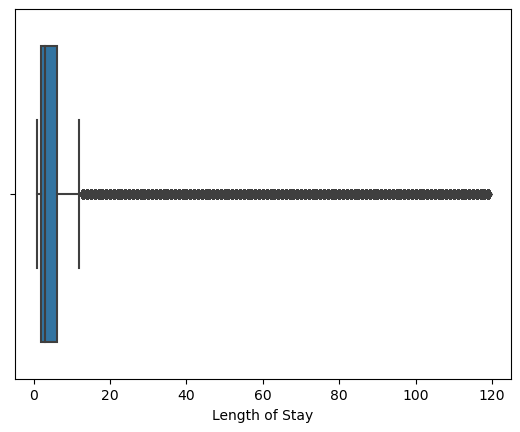

In [53]:
sns.boxplot(x=data['Length of Stay'])

<AxesSubplot:xlabel='Birth Weight'>

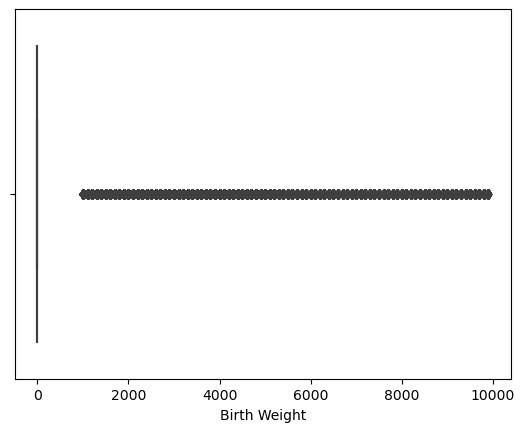

In [54]:
sns.boxplot(x=data['Birth Weight'])

<AxesSubplot:xlabel='APR Severity of Illness Code'>

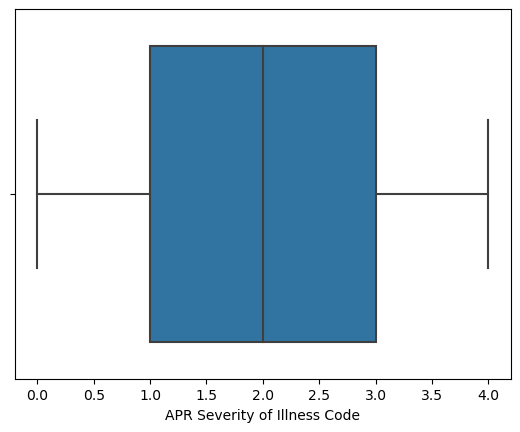

In [55]:
 #APR Severity of Illness Code:
        
sns.boxplot(x=data['APR Severity of Illness Code'])

<AxesSubplot:xlabel='Total Costs'>

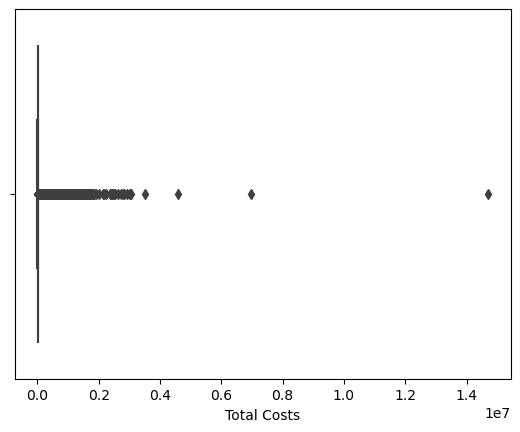

In [56]:
 #Total Costs
    
sns.boxplot(x=data['Total Costs'])

In [57]:
# using IQR Method:


Q1 = data['Total Charges'].quantile(0.25)
Q3 = data['Total Charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lc = Q1 - 1.5*IQR
uc = Q3 + 1.5*IQR

# Find the outliers
outliers_tc = data[(data['Total Charges'] < lc) | (data['Total Charges'] > uc)]

outliers_tc

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
14,14,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Black/African American,...,Self-Pay,Self-Pay,213154.0,218155.0,166545.0,0,N,Y,593921.09,282972.83
15,15,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Other Race,...,Self-Pay,Self-Pay,204436.0,218155.0,166545.0,0,N,Y,75589.96,25998.81
16,16,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,F,White,...,Self-Pay,Self-Pay,234674.0,204436.0,166545.0,0,N,Y,192248.22,61792.17
20,20,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,100.0,M,White,...,Self-Pay,Self-Pay,234890.0,195469.0,166545.0,0,N,N,87874.31,30610.49
22,22,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,100.0,M,White,...,Self-Pay,Self-Pay,170470.0,232742.0,166545.0,0,N,Y,77112.81,19752.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616416,2616416,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,F,White,...,Self-Pay,Self-Pay,138673.0,195267.0,166545.0,0,N,Y,299992.00,114446.16
2616424,2616424,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,F,Other Race,...,Self-Pay,Self-Pay,253793.0,203024.0,166545.0,0,N,Y,103224.89,38672.39
2616460,2616460,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,70 or Older,OOS,F,Black/African American,...,Self-Pay,Self-Pay,184126.0,184126.0,166545.0,0,N,N,156389.24,59015.68
2616463,2616463,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,70 or Older,OOS,F,Other Race,...,Insurance Company,Self-Pay,208701.0,248459.0,166545.0,0,N,Y,168386.93,60102.27


In [58]:
# using IQR Method for Birth weight:

Q1 = data['Birth Weight'].quantile(0.25)
Q3 = data['Birth Weight'].quantile(0.75)
IQR = Q3 - Q1
lc = Q1 - 1.5 * IQR
uc = Q3 + 1.5 * IQR
outliers_bw = data[(data['Birth Weight'] < lc) | (data['Birth Weight'] > uc)]
outliers_bw

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
31,31,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,101.0,F,Other Race,...,Self-Pay,Self-Pay,148296.0,195267.0,162010.0,3900,N,N,4935.00,821.47
97,97,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,109.0,F,Black/African American,...,Self-Pay,Self-Pay,164357.0,213633.0,248420.0,1100,N,N,112977.09,19365.14
138,138,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,112.0,M,White,...,Medicaid,Self-Pay,243831.0,195267.0,148296.0,3300,N,N,3071.00,514.55
180,180,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,113.0,M,White,...,Self-Pay,Self-Pay,243831.0,195267.0,202279.0,3500,N,N,4271.00,714.30
272,272,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,120.0,M,White,...,Self-Pay,Self-Pay,133253.0,114221.0,114221.0,3500,N,N,3085.38,523.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616225,2616225,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,115,F,Other Race,...,Self-Pay,Self-Pay,220166.0,220166.0,166545.0,3000,N,N,5761.44,2176.49
2616281,2616281,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,OOS,M,Other Race,...,Medicaid,Self-Pay,232816.0,244876.0,166545.0,3600,N,N,5581.23,2136.28
2616282,2616282,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,OOS,F,Black/African American,...,Self-Pay,Self-Pay,160988.0,160988.0,166545.0,3800,N,N,5672.97,2249.54
2616283,2616283,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,OOS,F,Other Race,...,Self-Pay,Self-Pay,160988.0,160988.0,166545.0,3200,N,N,3776.00,1434.68


In [59]:
# using IQR Method for length of stay:

Q1 = data['Length of Stay'].quantile(0.25)
Q3 = data['Length of Stay'].quantile(0.75)
IQR = Q3 - Q1
outliers1 = data[(data['Length of Stay'] < Q1 - 1.5*IQR) | (data['Length of Stay'] > Q3 + 1.5*IQR)]
outliers1

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
15,15,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Other Race,...,Self-Pay,Self-Pay,204436.0,218155.0,166545.0,0,N,Y,75589.96,25998.81
16,16,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,F,White,...,Self-Pay,Self-Pay,234674.0,204436.0,166545.0,0,N,Y,192248.22,61792.17
24,24,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,100.0,M,White,...,Blue Cross,Self-Pay,173488.0,237339.0,166545.0,0,N,Y,147451.23,52726.35
49,49,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,104.0,F,Other Race,...,Insurance Company,Medicaid,172323.0,172323.0,166545.0,0,N,Y,85783.95,30395.59
61,61,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,105.0,M,White,...,Blue Cross,Self-Pay,204436.0,252663.0,166545.0,0,N,Y,114610.57,36255.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617241,2617241,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,30 to 49,148,F,White,...,Medicaid,Self-Pay,161633.0,169629.0,166545.0,0,N,N,24363.22,10878.72
2617242,2617242,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,18 to 29,149,F,White,...,Medicaid,Self-Pay,169629.0,169629.0,166545.0,0,N,N,22463.33,9822.01
2617243,2617243,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,30 to 49,149,M,White,...,Medicaid,Self-Pay,169629.0,169629.0,166545.0,0,N,N,25967.78,11466.50
2617244,2617244,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,30 to 49,149,F,White,...,Medicaid,Self-Pay,169629.0,169629.0,166545.0,0,N,N,21571.25,9462.02


In [60]:
# using IQR Method for APR Severity of Illness Code:

Q1 = data['APR Severity of Illness Code'].quantile(0.25)
Q3 = data['APR Severity of Illness Code'].quantile(0.75)
IQR = Q3 - Q1

lc = Q1 - 1.5 * IQR
uc = Q3 + 1.5 * IQR

outliers_2 = data[(data['APR Severity of Illness Code'] < lc) | (data['APR Severity of Illness Code'] > uc)]
outliers_2

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs


In [61]:
# using IQR Method for Total Costs:

Q1 = data['Total Costs'].quantile(0.25)
Q3 = data['Total Costs'].quantile(0.75)
IQR = Q3 - Q1

lc = Q1 - 1.5*IQR
uc = Q3 + 1.5*IQR

outliers_3 = data[(data['Total Costs'] < lc) | (data['Total Costs'] > uc)]

outliers_3

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
14,14,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Black/African American,...,Self-Pay,Self-Pay,213154.0,218155.0,166545.0,0,N,Y,593921.09,282972.83
15,15,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Other Race,...,Self-Pay,Self-Pay,204436.0,218155.0,166545.0,0,N,Y,75589.96,25998.81
16,16,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,F,White,...,Self-Pay,Self-Pay,234674.0,204436.0,166545.0,0,N,Y,192248.22,61792.17
20,20,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,100.0,M,White,...,Self-Pay,Self-Pay,234890.0,195469.0,166545.0,0,N,N,87874.31,30610.49
24,24,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,100.0,M,White,...,Blue Cross,Self-Pay,173488.0,237339.0,166545.0,0,N,Y,147451.23,52726.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616416,2616416,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,F,White,...,Self-Pay,Self-Pay,138673.0,195267.0,166545.0,0,N,Y,299992.00,114446.16
2616424,2616424,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,F,Other Race,...,Self-Pay,Self-Pay,253793.0,203024.0,166545.0,0,N,Y,103224.89,38672.39
2616460,2616460,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,70 or Older,OOS,F,Black/African American,...,Self-Pay,Self-Pay,184126.0,184126.0,166545.0,0,N,N,156389.24,59015.68
2616463,2616463,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,70 or Older,OOS,F,Other Race,...,Insurance Company,Self-Pay,208701.0,248459.0,166545.0,0,N,Y,168386.93,60102.27


In [62]:
#finding the outliers of Total Charges using Z score method:

z_scores = stats.zscore(data['Total Charges'])

# Define threshold for outliers
threshold = 3

# Find the outliers
outliers_c = data[abs(z_scores) > threshold]

outliers_c

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
14,14,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Black/African American,...,Self-Pay,Self-Pay,213154.0,218155.0,166545.0,0,N,Y,593921.09,282972.83
83,83,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,106.0,M,White,...,Blue Cross,Self-Pay,204436.0,151449.0,166545.0,0,N,Y,455798.07,168482.84
106,106,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,109.0,M,White,...,Self-Pay,Self-Pay,245626.0,232301.0,233586.0,0,N,N,229916.79,109410.24
114,114,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,109.0,M,White,...,Self-Pay,Self-Pay,243376.0,243376.0,166545.0,0,N,Y,252201.76,86954.23
125,125,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,109.0,M,White,...,Medicare,Self-Pay,237807.0,216951.0,166545.0,0,N,N,221113.74,74059.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616322,2616322,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,30 to 49,OOS,M,White,...,Self-Pay,Self-Pay,162353.0,162353.0,166545.0,0,N,Y,263634.62,96407.56
2616340,2616340,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,30 to 49,OOS,M,Black/African American,...,Self-Pay,Self-Pay,213539.0,213539.0,166545.0,0,N,Y,280662.61,105819.98
2616370,2616370,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,M,White,...,Medicaid,Self-Pay,207877.0,138673.0,166545.0,0,N,N,217059.78,82682.51
2616392,2616392,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,M,Black/African American,...,Self-Pay,Self-Pay,207877.0,207877.0,166545.0,0,N,N,248048.36,94967.05


In [63]:
#finding the outliers of Birth Weight using Z score method:

z_scores = stats.zscore(data['Birth Weight'])

# Define threshold for outliers
threshold = 3

# Find the outliers
outliers_b = data[abs(z_scores) > threshold]

outliers_b

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
31,31,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,101.0,F,Other Race,...,Self-Pay,Self-Pay,148296.0,195267.0,162010.0,3900,N,N,4935.00,821.47
138,138,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,112.0,M,White,...,Medicaid,Self-Pay,243831.0,195267.0,148296.0,3300,N,N,3071.00,514.55
180,180,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,113.0,M,White,...,Self-Pay,Self-Pay,243831.0,195267.0,202279.0,3500,N,N,4271.00,714.30
272,272,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,120.0,M,White,...,Self-Pay,Self-Pay,133253.0,114221.0,114221.0,3500,N,N,3085.38,523.28
274,274,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,120.0,M,White,...,Medicaid,Self-Pay,243831.0,171241.0,114221.0,3300,N,N,4905.88,915.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616184,2616184,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,114,F,Other Race,...,Medicaid,Self-Pay,220166.0,220166.0,166545.0,4100,N,N,7986.54,2954.33
2616185,2616185,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,114,F,Other Race,...,Medicaid,Self-Pay,220166.0,220166.0,166545.0,3400,N,N,3828.39,1444.93
2616224,2616224,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,115,F,White,...,Medicaid,Self-Pay,160988.0,160988.0,166545.0,3600,N,N,69863.40,26606.82
2616281,2616281,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,0 to 17,OOS,M,Other Race,...,Medicaid,Self-Pay,232816.0,244876.0,166545.0,3600,N,N,5581.23,2136.28


In [64]:
#finding the outliers of Length of Stay using Z score method:

z_scores = stats.zscore(data['Length of Stay'])

# Define threshold for outliers
threshold = 3

# Find the outliers
outliers_ls = data[abs(z_scores) > threshold]

outliers_ls

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs


In [65]:
#finding the outliers of APR Severity of Illness Code using Z score method:

z_scores = stats.zscore(data['APR Severity of Illness Code'])

# Define threshold for outliers
threshold = 3

# Find the outliers
outliers_lc = data[abs(z_scores) > threshold]

outliers_lc

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs


In [66]:
 #finding the outliers of Total Costs using Z score method:
    
z_scores = stats.zscore(data['Total Costs'])

# Define threshold for outliers
threshold = 3

# Find the outliers
outliers_t = data[abs(z_scores) > threshold]

outliers_t

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
14,14,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,Black/African American,...,Self-Pay,Self-Pay,213154.0,218155.0,166545.0,0,N,Y,593921.09,282972.83
83,83,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,106.0,M,White,...,Blue Cross,Self-Pay,204436.0,151449.0,166545.0,0,N,Y,455798.07,168482.84
106,106,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,109.0,M,White,...,Self-Pay,Self-Pay,245626.0,232301.0,233586.0,0,N,N,229916.79,109410.24
164,164,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,50 to 69,112.0,M,White,...,Medicare,Blue Cross,218180.0,218180.0,166545.0,0,N,Y,515292.76,201340.50
196,196,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,113.0,M,Other Race,...,Medicare,Medicaid,181020.0,218155.0,166545.0,0,N,Y,608984.08,314589.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616160,2616160,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,70 or Older,113,M,White,...,Blue Cross,Self-Pay,226407.0,226407.0,166545.0,0,N,Y,480718.02,170340.70
2616322,2616322,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,30 to 49,OOS,M,White,...,Self-Pay,Self-Pay,162353.0,162353.0,166545.0,0,N,Y,263634.62,96407.56
2616340,2616340,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,30 to 49,OOS,M,Black/African American,...,Self-Pay,Self-Pay,213539.0,213539.0,166545.0,0,N,Y,280662.61,105819.98
2616392,2616392,New York City,Manhattan,7002054.0,3975.0,New York Presbyterian Hospital - Allen Hospital,50 to 69,OOS,M,Black/African American,...,Self-Pay,Self-Pay,207877.0,207877.0,166545.0,0,N,N,248048.36,94967.05


###  Treatment:

In [67]:
#treating the outliers of total cost using .clip()

data['Total Costs'].clip(lower = lc, upper = uc)

5           3246.34
6           6194.34
7           1435.34
8           2278.30
9           7491.89
             ...   
2617241    10878.72
2617242     9822.01
2617243    11466.50
2617244     9462.02
2617245    14702.06
Name: Total Costs, Length: 2614046, dtype: float64

In [68]:
#treating the outliers of total charges using .clip()

data['Total Charges'].clip(lower = lc, upper = uc)

5           8420.7500
6          21090.6300
7           3571.7500
8           7850.8400
9          13787.0000
              ...    
2617241    24363.2200
2617242    22463.3300
2617243    25667.5075
2617244    21571.2500
2617245    25667.5075
Name: Total Charges, Length: 2614046, dtype: float64

In [69]:
#treating the outliers of Birth Weight using .clip()

data['Birth Weight'].clip(lower = lc, upper = uc)

5          0
6          0
7          0
8          0
9          0
          ..
2617241    0
2617242    0
2617243    0
2617244    0
2617245    0
Name: Birth Weight, Length: 2614046, dtype: int64

In [70]:
#treating the outliers of APR Severity of Illness Code using .clip()

data['APR Severity of Illness Code'].clip(lower = lc, upper = uc)

5          2
6          2
7          2
8          1
9          1
          ..
2617241    2
2617242    2
2617243    2
2617244    2
2617245    2
Name: APR Severity of Illness Code, Length: 2614046, dtype: int64

In [71]:
# cleaned data:

data_new = data

In [72]:
data_new

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,Source of Payment 2,Source of Payment 3,Attending Provider License Number,Operating Provider License Number,Other Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
5,5,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,...,Self-Pay,Self-Pay,218155.0,195267.0,166545.0,0,N,N,8420.75,3246.34
6,6,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,M,White,...,Self-Pay,Self-Pay,207219.0,207219.0,166545.0,0,N,Y,21090.63,6194.34
7,7,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,...,Self-Pay,Self-Pay,244921.0,195267.0,166545.0,0,N,Y,3571.75,1435.34
8,8,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,100.0,F,White,...,Self-Pay,Self-Pay,242288.0,195267.0,166545.0,0,N,Y,7850.84,2278.30
9,9,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,30 to 49,100.0,M,White,...,Self-Pay,Self-Pay,191936.0,191936.0,166545.0,0,N,N,13787.00,7491.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617241,2617241,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,30 to 49,148,F,White,...,Medicaid,Self-Pay,161633.0,169629.0,166545.0,0,N,N,24363.22,10878.72
2617242,2617242,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,18 to 29,149,F,White,...,Medicaid,Self-Pay,169629.0,169629.0,166545.0,0,N,N,22463.33,9822.01
2617243,2617243,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,30 to 49,149,M,White,...,Medicaid,Self-Pay,169629.0,169629.0,166545.0,0,N,N,25967.78,11466.50
2617244,2617244,Central NY,Onondaga,3301008.0,9059.0,Crouse Hospital - Commonwealth Division,30 to 49,149,F,White,...,Medicaid,Self-Pay,169629.0,169629.0,166545.0,0,N,N,21571.25,9462.02
